<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1" data-toc-modified-id="Figure-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 1</a></span></li><li><span><a href="#Figure-2" data-toc-modified-id="Figure-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 2</a></span><ul class="toc-item"><li><span><a href="#Orthographic-projection" data-toc-modified-id="Orthographic-projection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Orthographic projection</a></span></li><li><span><a href="#Lambert-Conformal-projection" data-toc-modified-id="Lambert-Conformal-projection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lambert Conformal projection</a></span></li></ul></li></ul></div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import shapely.geometry as sgeom
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
%reload_ext watermark
%watermark --iversions -v -m

seaborn    0.9.0
numpy      1.17.3
xarray     0.14.1
matplotlib 3.1.2
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
colors = ["amber", "green", "purple"] #  , "greyish",
pal = sns.xkcd_palette(colors)

In [3]:
inpath = '/mnt/4data/CMAM/0A.daily/'
ds_pwd_wSSW = xr.open_dataset(f'{inpath}acceldiv/acceldiv_climatology.nc')
ds_pwd_wSSW['plev'] = ds_pwd_wSSW.plev/100.
ds_ogwd_wSSW = xr.open_dataset(f'{inpath}accelogw/accelogw_climatology.nc')
ds_ogwd_wSSW['plev'] = ds_ogwd_wSSW.plev/100.
ds_nogwd_wSSW = xr.open_dataset(f'{inpath}accelnogw/accelnogw_climatology.nc')
ds_nogwd_wSSW['plev'] = ds_nogwd_wSSW.plev/100.

In [4]:
ds_ogwd_wSSW_zm = ds_ogwd_wSSW['accelogw'].mean('lon')
ds_nogwd_wSSW_zm = ds_nogwd_wSSW['accelnogw'].mean('lon')
ds_wSSW_total = ds_pwd_wSSW['acceldiv']+ds_ogwd_wSSW_zm+ds_nogwd_wSSW_zm
ds_wSSW_ratio = ds_ogwd_wSSW_zm/ds_wSSW_total*100.

# Figure 1

/usr/local/lib/python3.6/dist-packages/xarray/plot/plot.py:925: UserWarning: linewidths is ignored by contourf
  primitive = ax.contourf(x, y, z, **kwargs)
/usr/local/lib/python3.6/dist-packages/xarray/plot/plot.py:925: UserWarning: linewidths is ignored by contourf
  primitive = ax.contourf(x, y, z, **kwargs)
/usr/local/lib/python3.6/dist-packages/xarray/plot/plot.py:925: UserWarning: linewidths is ignored by contourf
  primitive = ax.contourf(x, y, z, **kwargs)


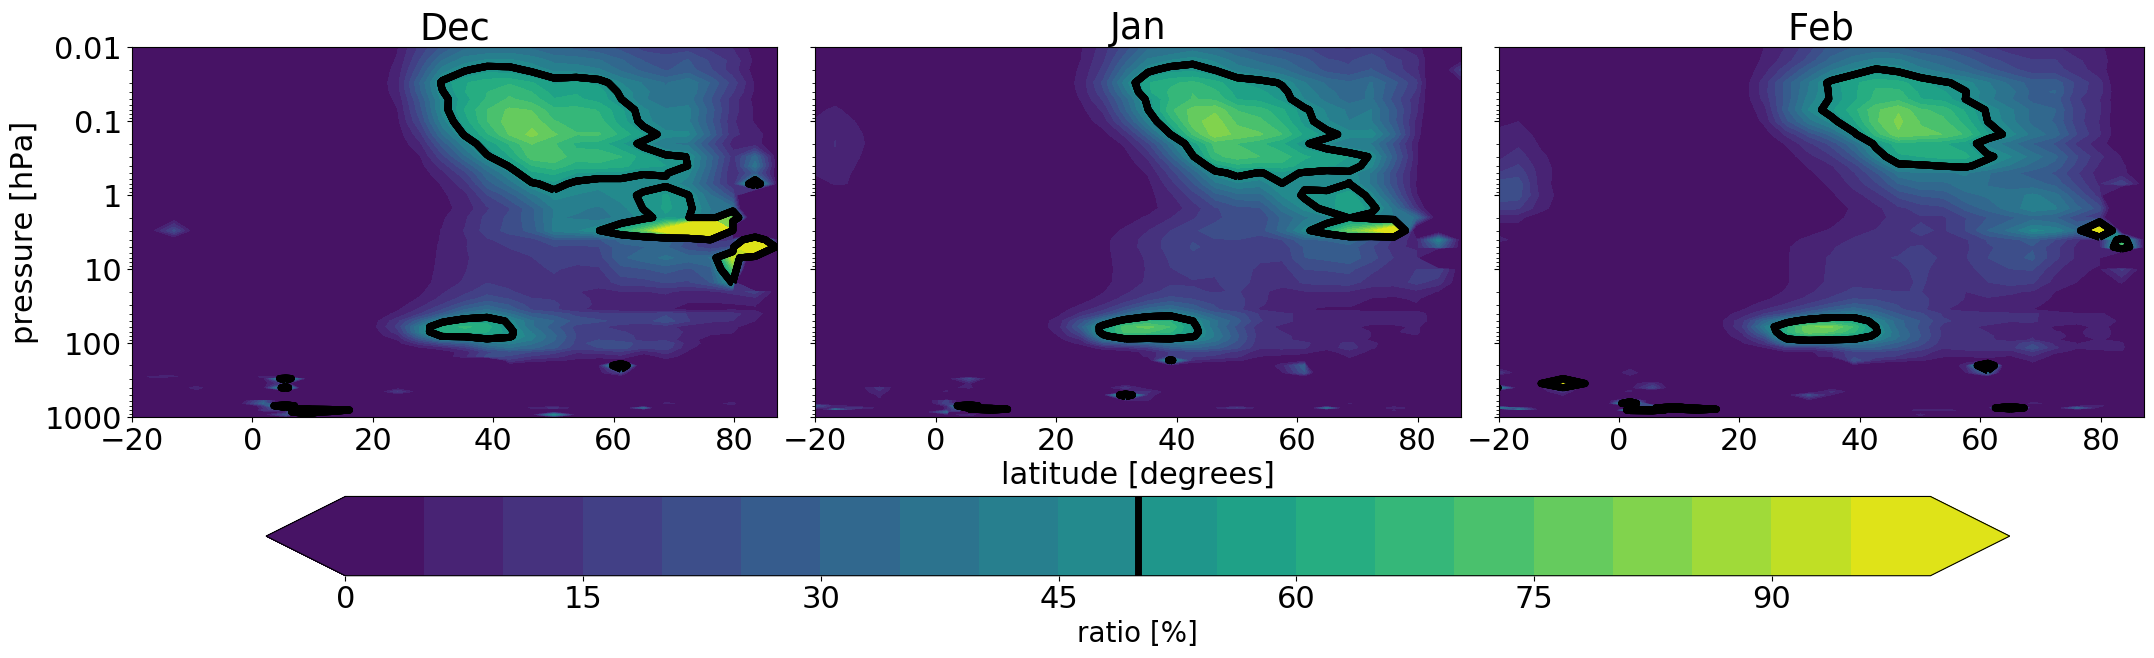

In [59]:
mpl.rcParams.update({'font.size': 22})
col_wrap = 3
fgp = xr.plot.FacetGrid(ds_wSSW_ratio.sel(month = [12,1,2]), col = 'month', size = 7, col_wrap = col_wrap)
#plot_kwargs = dict(yincrease = False, colors=('k'), levels=[50], add_colorbar = False, linewidths = 2.5)
plot_kwargs = dict(yincrease = False, colors=('k'), vmax = 50.001, \
                   add_colorbar = False, vmin = 49.999, linewidths = 5)
fgp.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)
plot_kwargs.pop('colors')
#plot_kwargs.pop('linewidths')

plot_kwargs['levels'] = 21
plot_kwargs['vmax'] = 100
plot_kwargs['vmin'] = 0
plot_kwargs['cmap'] = 'viridis'#'RdBu_r'
plot_kwargs['add_colorbar'] = True
#plot_kwargs['extend'] = 'neither'
fgp.map_dataarray(xr.plot.contourf, 'lat', 'plev', \
                  cbar_kwargs={"orientation": "horizontal", 'pad': 0.15}, **plot_kwargs,)
fgp.cbar.set_label('ratio [%]', fontsize = 20)
fgp.cbar.ax.plot([0.5]*2, [0, 1], 'k', lw =5)
fgp.set_xlabels('')
fgp.set_ylabels('')

month_title_ls = ['Dec','Jan', 'Feb']#['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec']
for i,ax in enumerate(fgp.axes.flat):
    ax.set_ylim(1000,0.01)
    ax.set_title(month_title_ls[i])
    ax.set_yscale('log')
    ax.set_xlim(-20,)
    ax.set_xticks(np.arange(-20,100,20))
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    if (i == 10):
        ax.set_xlabel('latitude [degrees]', fontsize = 20)
        ax.text(-1.5,1.75,'pressure [hPa]', \
                    transform=ax.transAxes,  rotation='vertical', fontsize = 20)
    if (i == 1):
        ax.set_xlabel('latitude [degrees]')#, fontsize = 20)
    if (i == 0):
        ax.set_ylabel('pressure [hPa]')

   
    #ax.set
    
plt.savefig('ratio_oGWD_vs_PWD+noGWD_climatology_wSSW_all.pdf', bbox_inches='tight')

# Figure 2

## Orthographic projection

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The get_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_cmap instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The set_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_cmap instead.


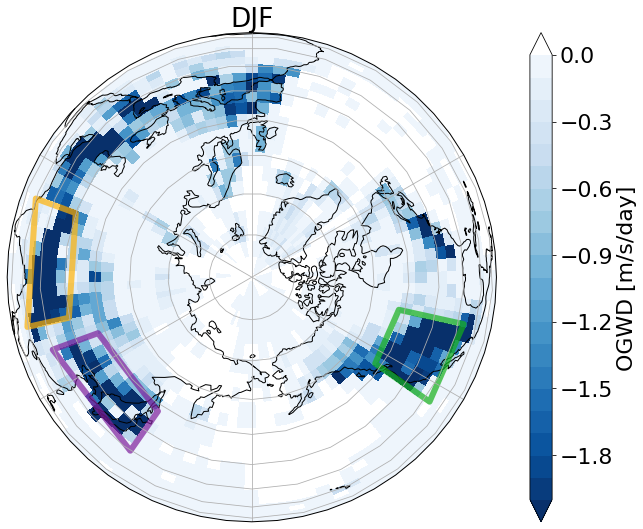

In [16]:
mpl.rcParams.update({'font.size': 22})
projection = ccrs.Orthographic(180, 90)
lw = 6
alpha = 0.7

arr = (ds_ogwd_wSSW.accelogw*24*3600).sel(month = [12,1,2], \
                                        plev = 70, \
                                        lat = slice(None,None)).mean('month')

fig = plt.figure(figsize = (12,9))
ax = plt.axes(projection=projection)
p = arr.plot(levels = np.arange(-2,0.1,0.1), \
                transform=ccrs.PlateCarree(), \
                vmax = 0.1, \
                vmin = -2, \
                cmap = 'Blues_r', \
                add_colorbar = True, \
                ax = ax)
#size = 20, \\
p.colorbar.set_label('OGWD [m/s/day]')
cmap = p.colorbar.get_cmap()
cmap.set_over('w')
p.colorbar.set_cmap(cmap)

box = sgeom.box(minx=70, maxx=102.5, miny=20, maxy=40)
box2 = sgeom.box(minx=110, maxx=145, miny=30, maxy=48)
box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
month_title_ls = ['Dec','Jan','Feb']

ax.coastlines()
ax.set_title('DJF')
gl = ax.gridlines()
ax.add_geometries([box,box2,box3], ccrs.PlateCarree(), \
                  facecolor=['none','none','none'], edgecolor=[pal[0],pal[2],pal[1]], \
                  linewidth = [lw,lw,lw], alpha=alpha)

plt.savefig('oGWD_map@70hPa_climatology_hotspots_DJF.pdf', bbox_inches='tight')

##  Lambert Conformal projection

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The get_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_cmap instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The set_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_cmap instead.


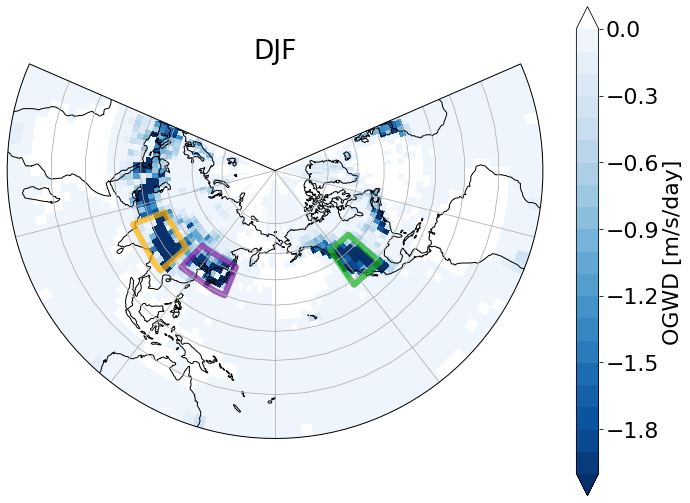

In [7]:
mpl.rcParams.update({'font.size': 22})
projection = ccrs.LambertConformal(180,30)#Orthographic(180, 90)
lw = 6
alpha = 0.7

arr = (ds_ogwd_wSSW.accelogw*24*3600).sel(month = [12,1,2], \
                                        plev = 70, \
                                        lat = slice(None,None)).mean('month')

fig = plt.figure(figsize = (12,9))
ax = plt.axes(projection=projection)
p = arr.plot(levels = np.arange(-2,0.1,0.1), \
                transform=ccrs.PlateCarree(), \
                vmax = 0.1, \
                vmin = -2, \
                cmap = 'Blues_r', \
                add_colorbar = True, \
                ax = ax)
#size = 20, \\
p.colorbar.set_label('OGWD [m/s/day]')
cmap = p.colorbar.get_cmap()
cmap.set_over('w')
p.colorbar.set_cmap(cmap)

box = sgeom.box(minx=70, maxx=102.5, miny=20, maxy=40)
box2 = sgeom.box(minx=110, maxx=145, miny=30, maxy=48)
box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
month_title_ls = ['Dec','Jan','Feb']

ax.coastlines()
ax.set_title('DJF')
gl = ax.gridlines()
ax.add_geometries([box,box2,box3], ccrs.PlateCarree(), \
                  facecolor=['none','none','none'], edgecolor=[pal[0],pal[2],pal[1]], \
                  linewidth = [lw,lw,lw], alpha=alpha)

plt.savefig('oGWD_map@70hPa_climatology_hotspots_DJF_LCp.pdf', bbox_inches='tight')